<h1><center> Aula 8 - Prática em Classificação </center></h1>

O problema fundamental de classificação consiste em determinar a quais classes (rótulo) um dado previamente não visto pertence. Nesta aula prática vamos abordar este assunto. Essa aula vai introduzir também conceitos que serão vistos com mais detalhes nas aulas seguintes. Nosso objetivo é começar com <a href= https://scikit-learn.org/stable/modules/tree.html> Árvore de decisão </a>, conforme visto na aula teórica e depois mergulhar um pouco mais para explorar classificadores diferentes, por exemplo: <a href= https://scikit-learn.org/stable/modules/naive_bayes.html> Naive Bayes </a>, <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a> e <a href = https://scikit-learn.org/stable/modules/svm.html>SVM</a>. 

A base de dados escolhida hoje vem de um repositório chamado UCI e o problema apresentado consiste em prever se determinada pessoa tem um salário anual maior que 50K:
<a href= https://archive.ics.uci.edu/ml/datasets/Adult>Descrição da base</a> <a href= https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data>Download da base</a> 


Adicionalmente vamos praticar os conceitos aprendidos na aula anterior e tentar usar o algoritmo construído em sala para classificar a mesma base de dados. Mãos a obra!

O primeiro passo é importar as bibliotecas que serão utilizadas. Abaixo estão as principais bibliotecas que já conhecemos, com alguns componentes novos. Tire um tempo para pesquisar um pouco sobre cada um deles.  

Em outros pontos do código serão necessárias novos módulos. Vamos deixar para chamar esses módulos mais próximo de onde serão usados. 

In [10]:
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score

Lendo a base e excluindo as tuplas null .csv é mostrada abaixo:

In [29]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"]

df = pd.read_csv("/Users/aluno/Documents/GitHub/Pos/HXGP/pos-ds-ia-master/aula_08-ArvoreDeDecisao/data.csv", names=features,
    sep=r'\s*,\s*',
    engine='python',
    na_values="?").dropna()


In [30]:
#vamos dar uma espiada na base
df.head(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
# qual o tamanho da nossa base?
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (30162, 15)


Agora precisamos separar o atributo que queremos prever dos demais

In [32]:
""" target são os valores que queremos prever."""
target = df['Target']

""" Agora podemos retirar a coluna do DataFrame. Para isto, utilize a função drop"""
df = df.drop(['Target'],axis=1)

""" mostre os nomes de colunas do dataframe para verificar exclusão da coluna"""
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country'],
      dtype='object')

No próximo passo vamos binarizar os atributos categóricos:

Transformaremos a coluna:

| Workclass |
|------|
| Private  |
| Self-emp-not-inc  |
| Local-gov  |
| State-gov  |
| Self-emp-inc  |
| Federal-gov  |
| Without-pay  |


para algo semelhante a:

| Private  | Self-emp-not-inc  | Local-gov  | State-gov  | Self-emp-inc  | Federal-gov  | Without-pay |
|----------|-------------------|------------|------------|---------------|--------------|-------------|
|1|0|0|0|0|0|0|
|0|1|0|0|0|0|0|
|0|0|1|0|0|0|0|
|0|0|0|1|0|0|0|
|0|0|0|0|1|0|0|
|0|0|0|0|0|1|0|
|0|0|0|0|0|0|1|

Esse processo é usado com bastante frequência e recebe o nome de <i>One-Hot Encoding</i>. Existe uma função built-in do pandas para executar essa tarefa chamada <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html > get_dummies()</a>. Faça uma visita à página da documentação para entender melhor. 

Acessando o link acima, podemos ver que a função get_dummies é aplicada automaticamente em todas as colunas do DataFrame que apresentam tipo = Object. Podemos então passar todo o DataFrame como entrada para a função.

Utilizando nossos dados como entrada, vamos aplicar a função get_dummies. Lembre-se que esta é uma função do pandas, e sua chamada deve ser feita da forma: 

<b> saida = pd.nome_funcao(entrada) </b>

In [33]:
""" Aplique a função get_dummies""" 

#YOUR CODE HERE
df = pd.get_dummies(df)

In [34]:
#vamos dar mais uma espiada no DataFrame para ver como ficou, bem como seu novo tamanho
df.head(5)

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.shape

(30162, 104)

<h2><center> Mergulhando no Aprendizado </center></h2>

Vamos começar separando nossos dados em conjuntos de treino e teste. Para que as métricas do seu teste sejam confiáveis, você não pode mostrar nenhum dado do teste durante o treinamento para o modelo. Isso pode ser feito de mais de uma forma: *train test split, cross validation, leave one out etc*. Volte nos slides da aula ou consulte alguns outros materiais online se ficar alguma dúvida. 

A biblioteca sklearn fornece algumas funções que separam os dados para treino e teste podem ser vistos [aqui](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).
Para esse exemplo, utilizaremos o train_test_split e a sua [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) no scikit-learn

In [36]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

Sempre ao usar aleatoriedade nos seus códigos, guarde a semente usada para aleatorizar garantindo que os resultados serão reprodutíveis e comparações entre execuções poderão ser feitas sem maiores dificuldades

In [37]:
RANDOM_STATE = 1

Finalmente, usando a semente aleatória guardada na variável "RANDOM_STATE" e o módulo train_test_split importado do sklearn, podemos separar nossa base em grupos para o treino e o teste. Observem como a lista de variáveis escrita anteriormente pode ser passada para o dataframe como um "filtro" de quais colunas queremos dele.

In [77]:
""" 
 divida os dados em conjuntos de treino e teste, o parâmetro test_size indica 
 o percentual de amostras que serão selecionadas para teste 
 para este exemplo, utilize test_size = 0.25
"""
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target, 
                                                    test_size=0.33, # 33% será amostra de teste
                                                    random_state=RANDOM_STATE,
                                                    stratify=target)

#  Árvore de decisão

Nessa aula prática, vamos comparar os resultados de alguns classificadores. Primeiramente vamos praticar com o algoritmo de <a href= https://scikit-learn.org/stable/modules/tree.html> Árvore de decisão </a>. Na sequência, fica como exercício modificar o código para usar outros classificadores disponíveis na biblioteca para efetuar a comparação

Sugestão de algoritmos para comparação:
<a href= https://scikit-learn.org/stable/modules/naive_bayes.html> Naive Bayes </a>, <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a> e <a href = https://scikit-learn.org/stable/modules/svm.html>SVM</a>.


Começaremos importando a árvore de decisão [(sklearn.tree)](http://scikit-learn.org/stable/modules/tree.html) e a visualização da árvore será feita com o graphviz [(sklearn.export_graphviz)](http://scikit-learn.org/stable/modules/tree.html). 

Utilize a célula abaixo para visualizar a árvore construída pelo seu classificador. Experimente variar os parâmetros do classificador e observe o efeito resultante na árvore:

* Nenhum parâmetro
* Ajuste o tamanho máximo da árvore para 3:
        tree.DecisionTreeClassifier(max_depth=3)
* Ajuste a quantidade mínima de elementos nas folhas para 4:
        tree.DecisionTreeClassifier(min_samples_leaf=4)
* Altere o RANDOM_STATE para None e observe que a árvore gerada poderá variar mesmo que todo o resto permaneça constante

In [78]:
# Usando o módulo tree para chamar o classificador de árvore de decisão
from sklearn import tree

# Guardando a semente aleatória
RANDOM_STATE = 1

# vamos variar os parâmetros da DecisionTree implementada no sklearn, busque sua explicação detalhada na documentação
dec_clf = tree.DecisionTreeClassifier()

# Usando os arquivos de treino com as variáveis e o target, ajustamos um modelo
dec_clf.fit(X_train, y_train)

variables = df.columns

# Usando a biblioteca graphviz, podemos plotar a árvore gerada pelo nosso modelo 
# Caso você não tenha instale usando o comando pip install graphviz
# import graphviz:
# dot_data = tree.export_graphviz(dec_clf, out_file=None, feature_names=variables, 
#                                 class_names=dec_clf.classes_, filled=True) 
# graph = graphviz.Source(dot_data) 
# graph

<b>Após treino, o objeto "dec_clf" é o nosso classificador por árvore de decisão. Podemos usá-lo para prever o valor das variáveis no conjunto de teste:</b>

In [79]:
# Aplica o modelo nas variáveis de teste
y_pred = dec_clf.predict(X_test)

In [80]:
#Avaliando o resultado: acuracia. Pergunta: Quais são potenciais problemas de se usar apenas a acurácia?
acuracia = accuracy_score(y_pred, y_test)
print("Acuracia de "+str(acuracia))
print("\n\n")

Acuracia de 0.8103275065300382





<b>Uma forma de avaliar o nosso modelo é comparando o valor previsto com o valor conhecido (salvo na variável y_test). A partir dessa comparação, construiremos a matriz de confusão, de onde podemos tirar a acurácia, precisão, revocação etc. Para isso, importaremos mais uma biblioteca [sklearn.confusion_matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html):</b>

In [81]:
from sklearn.metrics import confusion_matrix

# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test, y_pred)

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=('Prev ' + dec_clf.classes_), 
             index=('True ' + dec_clf.classes_))


,Prev <=50K,Prev >50K
True <=50K,6517,959
True >50K,929,1549


Podemos plotar uma matriz mais interessante com a função abaixo usando o matplotlib.pyplot e a biblioteca itertools. Essa função utiliza muito da biblioteca matplotlib e o objetivo não é entendê-la, apenas usá-la para visualização no momento. O código foi disponibilizado originalmente na documentação da matriz de confusão no sklearn (link na célula acima).

In [43]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<b>Usando a função declarada acima plotamos novamente a matriz de confusão</b>

Confusion matrix, without normalization


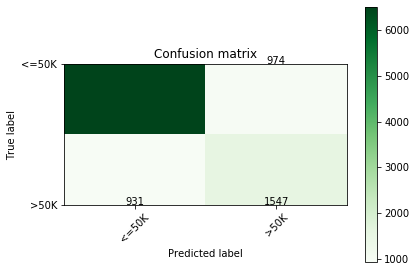

In [44]:
plot_confusion_matrix(cnf_matrix, dec_clf.classes_, normalize=False, 
                      title='Confusion matrix', cmap=plt.cm.Greens)

<b>A matriz de confusão mostrada acima pode ser usada para construção da precisão e da revocação de cada classe: uma excelente explicação detalhada dessas métricas é dada [aqui](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o)</b>. Abaixo vamos construir uma função para calcular esse valores. Primeiro vamos calcular na mão, usando as definições. Depois disso vamos consultaralguns outros materiais para construir essa função.

In [0]:
#def prec_revoc(cnf_matrix, classes):
#    prec = []
#    revoc = []
    
    # SEU CÓDIGO AQUI!
    
#    print(pd.DataFrame([prec,revoc], columns=classes, index=['Precisão', 'Revocação']))

In [0]:
#prec_revoc(cnf_matrix, dec_clf.classes_)

# Mãos à obra!

Vamos aproveitar o código anterior, fazer as devidas modificações e comparar o resultado da nossa árvore com outros algoritmos de classificação.

Extra: Vamos comparar também com o Perceptron criado na aula anterior?